## Gradient Descent(batch)

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

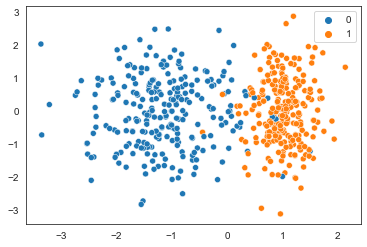

In [138]:
X, t = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=14)

t = t[:, np.newaxis]
sns.set_style('white')
sns.scatterplot(x=X[:, 0], y=X[:,1], hue=t.reshape(-1))
plt.show()

In [139]:
def sigmoid(x):
    return (1)/(1 + np.exp(-x))

In [140]:
def compute_cost(X, t, w):
    N = len(t)
    h = sigmoid(X @ w)
    epsilon = 1e-5
    cost = (1/N)*(((-t).T @ np.log(h+epsilon)) - ((1-t).T @ np.log(1- h + epsilon)))
    return cost

In [141]:
# learning_rate: 얼마나 빨리 grandient를 업데이트 할것인지를 나타내는 변수(한번에 얼마나 많은 gradient를 움직일것인지)
# iterations: 몇번동안 gradient를 업데이트 할것인지를 나타내는 변수

def gradient_descent(X, t, w, learning_rate, iterations): 
    N = len(t)
    cost_history = np.zeros((iterations, 1))
    
    for i in range(iterations):
        w = w - (learning_rate/N) * (X.T @ (sigmoid(X @ w) - t))
        cost_history[i] = compute_cost(X, t, w)
        
    return (cost_history, w)

In [142]:
def predict(X, w):
    return np.round(sigmoid (X @ w))

Initial Cost is [[0.69312718]]

Optimal Parameters are: 
 [[-0.07024012]
 [ 1.9275589 ]
 [ 0.02285894]] 



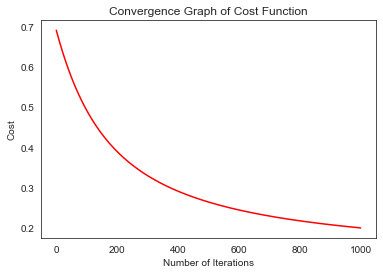

In [143]:
N = len(t)

X = np.hstack((np.ones((N,1)), X))
M = np.size(X,1)
w = np.zeros((M,1))

iterations = 1000
learning_rate = 0.01

initial_cost = compute_cost(X, t, w)

print("Initial Cost is {}\n".format(initial_cost))

(cost_history, w_optimal) = gradient_descent(X, t, w, learning_rate, iterations)

print("Optimal Parameters are: \n", w_optimal, '\n')

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title('Convergence Graph of Cost Function')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

In [144]:
## Accuracy

y_pred = predict(X, w_optimal)
score = float(sum(y_pred == t)) / float(len(t))
print(score)

0.954


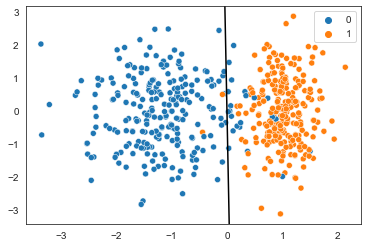

(array([-3.63200028,  2.41016276]), array([ 306.26508825, -203.23476078]))

In [145]:
slope = -(w_optimal[1] / w_optimal[2])
intercept = -(w[0] / w_optimal[2])

sns.set_style('white')
sns.scatterplot(x = X[:,1], y = X[:,2], hue=t.reshape(-1))

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c='k')
plt.show()
x_vals, y_vals

## Stochastic Gradient Descent

In [150]:
def sgd(X, t, w, learning_rate, iterations):
    N = len(t)
    cost_history = np.zeros((iterations, 1))
    
    for i in range(iterations):
        i = i % N
        w = w - learning_rate * (X[i, np.newaxis].T * (sigmoid(X[i] @ w) - t[i]))
        cost_history[i] = compute_cost(X[i], t[i], w)
    
    return (cost_history, w)

In [151]:
X, t = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=14)

t = t[:, np.newaxis]
N = len(t)

X = np.hstack((np.ones((N,1)), X))
M = np.size(X,1)
w = np.zeros((M,1))

iterations = 2000
learning_rate = 0.01

initial_cost = compute_cost(X, t, w)

print("Initial Cost is {}\n".format(initial_cost))

(cost_history, w_optimal) = sgd(X, t, w, learning_rate, iterations)

print("Optimal Parameters are: \n", w_optimal, '\n')


Initial Cost is [[0.69312718]]

Optimal Parameters are: 
 [[-0.19304782]
 [ 2.5431236 ]
 [ 0.01130098]] 



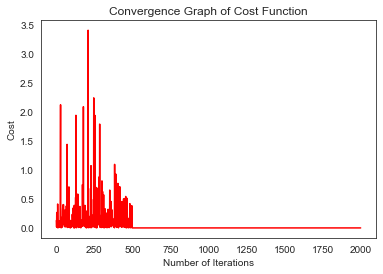

In [152]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title('Convergence Graph of Cost Function')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

In [153]:
## Accuracy

y_pred = predict(X, w_optimal)
score = float(sum(y_pred == t)) / float(len(t))
print(score)

0.96


## Mini-batch Gradient Descent

- 배치 사이즈를 조절하여 gradient descent로 w를 업데이트

In [154]:
def batch_gd(X, t, w, learning_rate, iterations, batch_size):
    N = len(t)
    cost_history = np.zeros((iterations, 1))
    shuffled_indices = np.random.permutation(N)
    X_shuffled = X[shuffled_indices]
    t_shuffled = t[shuffled_indices]
    
    for i in range(iterations):
        i = i % N
        X_batch = X_shuffled[i:i+batch_size]
        t_batch = t_shuffled[i:i+batch_size]
        # batch가 epoch경계를 넘어가는 경우, 앞부분으로 채워줌
        if X_batch.shape[0] < batch_size:
            X_batch = np.vstack((X_batch, X_shuffled[:batch_size - X_batch.shape[0]]))
            t_batch = np.vstack((t_batch, t_shuffled[:batch_size - t_batch.shape[0]]))
        w = w - (learning_rate/batch_size) * (X_batch.T @ (sigmoid(X_batch @ w) - t_batch))
        cost_history[i] = compute_cost(X_batch, t_batch, w)
    
    return (cost_history, w)

In [158]:
X, t = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=14)

t = t[:, np.newaxis]
N = len(t)

X = np.hstack((np.ones((N,1)), X))
M = np.size(X,1)
w = np.zeros((M,1))

iterations = 1000
batch_size = 32
learning_rate = 0.01

initial_cost = compute_cost(X, t, w)

print("Initial Cost is {}\n".format(initial_cost))

(cost_history, w_optimal) = batch_gd(X, t, w, learning_rate, iterations, batch_size)

print("Optimal Parameters are: \n", w_optimal, '\n')


Initial Cost is [[0.69312718]]

Optimal Parameters are: 
 [[-0.06251358]
 [ 1.9215181 ]
 [ 0.01854152]] 



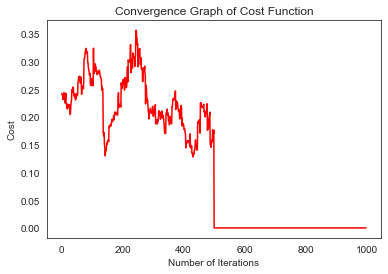

In [159]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title('Convergence Graph of Cost Function')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

In [160]:
## Accuracy

y_pred = predict(X, w_optimal)
score = float(sum(y_pred == t)) / float(len(t))
print(score)

0.954
